# Problem Statement

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house

In [45]:
#libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [46]:
#Dataset 
df=pd.read_csv("housing_train.csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [47]:
dff=pd.read_csv("housing_test.csv")
dff

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [49]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [50]:
#to identifying null values 
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

Alley: 0.9341% missing values
MasVnrType: 0.006% missing values
BsmtQual: 0.0257% missing values
BsmtCond: 0.0257% missing values
BsmtExposure: 0.0265% missing values
BsmtFinType1: 0.0257% missing values
BsmtFinType2: 0.0265% missing values
FireplaceQu: 0.4717% missing values
GarageType: 0.0548% missing values
GarageFinish: 0.0548% missing values
GarageQual: 0.0548% missing values
GarageCond: 0.0548% missing values
PoolQC: 0.994% missing values
Fence: 0.7971% missing values
MiscFeature: 0.9623% missing values


In [51]:
features_nan_test=[feature for feature in dff.columns if dff[feature].isnull().sum()>1 and dff[feature].dtypes=='O']

for feature in features_nan_test:
    print("{}: {}% missing values".format(feature,np.round(dff[feature].isnull().mean(),4)))

Alley: 0.9521% missing values
BsmtQual: 0.024% missing values
BsmtCond: 0.024% missing values
BsmtExposure: 0.024% missing values
BsmtFinType1: 0.024% missing values
BsmtFinType2: 0.024% missing values
FireplaceQu: 0.476% missing values
GarageType: 0.0582% missing values
GarageFinish: 0.0582% missing values
GarageQual: 0.0582% missing values
GarageCond: 0.0582% missing values
Fence: 0.8493% missing values
MiscFeature: 0.9658% missing values


In [52]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [53]:
dff.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [54]:
#replacing all NaN values

df['PoolQC'].fillna('NoPool',inplace=True)

df['MiscFeature'].fillna('None',inplace=True)

df['Alley'].fillna('Noalleyaccess',inplace=True)

df['Fence'].fillna('NoFence',inplace=True)

df['FireplaceQu'].fillna('NoFireplace',inplace=True)

basement=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for i in basement:
    df[i].fillna('NoBasement',inplace=True)

In [55]:
dff['PoolQC'].fillna('NoPool',inplace=True)

dff['MiscFeature'].fillna('None',inplace=True)

dff['Alley'].fillna('Noalleyaccess',inplace=True)

dff['Fence'].fillna('NoFence',inplace=True)

dff['FireplaceQu'].fillna('NoFireplace',inplace=True)

basement=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for i in basement:
    dff[i].fillna('NoBasement',inplace=True)

In [56]:
def replace(ds,f_nan):
    data=ds.copy()
    data[f_nan]=data[f_nan].fillna('Missing')
    return data

df=replace(df,features_nan)

df[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [57]:
dff=replace(dff,features_nan_test)

dff[features_nan_test].isnull().sum()

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
Fence           0
MiscFeature     0
dtype: int64

In [58]:
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

for feature in numerical_with_nan:
    print("{}: {}".format(feature,np.around(df[feature].isnull().mean(),4)))

LotFrontage: 0.1832
MasVnrArea: 0.006
GarageYrBlt: 0.0548


In [59]:
numerical_with_nan_test=[feature for feature in dff.columns if dff[feature].isnull().sum()>1 and dff[feature].dtypes!='O']

for feature in numerical_with_nan_test:
    print("{}: {}".format(feature,np.around(dff[feature].isnull().mean(),4)))

LotFrontage: 0.1541
GarageYrBlt: 0.0582


In [60]:
for feature in numerical_with_nan:
    median_value=df[feature].median()
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [61]:
for feature in numerical_with_nan_test:
    median_value=dff[feature].median()
    dff[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan_test].isnull().sum()

LotFrontage    0
GarageYrBlt    0
dtype: int64

In [62]:
#drop ID column 
df.drop('Id',axis=1,inplace=True)
df

MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0            120       RL         70.0     4928   Pave  Noalleyaccess   
1             20       RL         95.0    15865   Pave  Noalleyaccess   
2             60       RL         92.0     9920   Pave  Noalleyaccess   
3             20       RL        105.0    11751   Pave  Noalleyaccess   
4             20       RL         70.0    16635   Pave  Noalleyaccess   
...          ...      ...          ...      ...    ...            ...   
1163          20       RL         70.0     9819   Pave  Noalleyaccess   
1164          20       RL         67.0     8777   Pave  Noalleyaccess   
1165         160       RL         24.0     2280   Pave  Noalleyaccess   
1166          70  C (all)         50.0     8500   Pave           Pave   
1167          60       RL         70.0     7861   Pave  Noalleyaccess   

     LotShape LandContour Utilities LotConfig  ... PoolArea  PoolQC    Fence  \
0         IR1         Lvl    AllPub    Inside  ...        0  NoPool  NoFence   
1         IR1         Lvl    AllPub    Inside  ...        0  NoPool  NoFence   
2         IR1         Lvl    AllPub   CulDSac  ...        0  NoPool  NoFence   
3         IR1         Lvl    AllPub    Inside  ...        0  NoPool    MnPrv   
4         IR1         Lvl    AllPub       FR2  ...        0  NoPool  NoFence   
...       ...         ...       ...       ...  ...      ...     ...      ...   
1163      IR1         Lvl    AllPub    Inside  ...        0  NoPool    MnPrv   
1164      Reg         Lvl    AllPub    Inside  ...        0  NoPool    MnPrv   
1165      Reg         Lvl    AllPub       FR2  ...        0  NoPool  NoFence   
1166      Reg         Lvl    AllPub    Inside  ...        0  NoPool    MnPrv   
1167      IR1         Lvl    AllPub    Inside  ...        0  NoPool  NoFence   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0           None       0      2    2007        WD         Normal     128000  
1           None       0     10    2007        WD         Normal     268000  
2           None       0      6    2007        WD         Normal     269790  
3           None       0      1    2010       COD         Normal     190000  
4           None       0      6    2009        WD         Normal     215000  
...          ...     ...    ...     ...       ...            ...        ...  
1163        None       0      2    2010        WD         Normal     122000  
1164        None       0      5    2009        WD         Normal     108000  
1165        None       0      7    2009        WD         Normal     148500  
1166        None       0      7    2008        WD         Normal      40000  
1167        None       0      6    2006        WD         Normal     183200  

[1168 rows x 80 columns]

In [63]:
dff.drop('Id',axis=1,inplace=True)
dff

MSSubClass MSZoning  LotFrontage  LotArea Street          Alley LotShape  \
0            20       RL         86.0    14157   Pave  Noalleyaccess      IR1   
1           120       RL         65.0     5814   Pave  Noalleyaccess      IR1   
2            20       RL         65.0    11838   Pave  Noalleyaccess      Reg   
3            70       RL         75.0    12000   Pave  Noalleyaccess      Reg   
4            60       RL         86.0    14598   Pave  Noalleyaccess      IR1   
..          ...      ...          ...      ...    ...            ...      ...   
287          20       RL         78.0    10206   Pave  Noalleyaccess      Reg   
288          20       RL         57.0     9245   Pave  Noalleyaccess      IR2   
289          20       RL         65.0    11241   Pave  Noalleyaccess      IR1   
290          50       RM         50.0     5000   Pave  Noalleyaccess      Reg   
291         160       RM         21.0     1953   Pave  Noalleyaccess      Reg   

    LandContour Utilities LotConfig  ... ScreenPorch PoolArea  PoolQC  \
0           HLS    AllPub    Corner  ...           0        0  NoPool   
1           Lvl    AllPub   CulDSac  ...           0        0  NoPool   
2           Lvl    AllPub    Inside  ...           0        0  NoPool   
3           Bnk    AllPub    Inside  ...           0        0  NoPool   
4           Lvl    AllPub   CulDSac  ...           0        0  NoPool   
..          ...       ...       ...  ...         ...      ...     ...   
287         Lvl    AllPub    Inside  ...           0        0  NoPool   
288         Lvl    AllPub    Inside  ...           0        0  NoPool   
289         Lvl    AllPub   CulDSac  ...           0        0  NoPool   
290         Lvl    AllPub    Corner  ...           0        0  NoPool   
291         Lvl    AllPub    Inside  ...           0        0  NoPool   

       Fence MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0    NoFence        None       0       7    2007        WD         Normal  
1    NoFence        None       0       8    2009       COD        Abnorml  
2    NoFence        None       0       6    2009        WD         Normal  
3    NoFence        None       0       7    2009        WD         Normal  
4    NoFence        None       0       1    2008        WD         Normal  
..       ...         ...     ...     ...     ...       ...            ...  
287  NoFence        None       0      10    2008        WD         Normal  
288  NoFence        None       0       2    2008        WD         Normal  
289  NoFence        Shed     700       3    2010        WD         Normal  
290  NoFence        None       0      10    2006        WD         Normal  
291  NoFence        None       0       6    2006        WD         Normal  

[292 rows x 79 columns]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [65]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   Alley          292 non-null    object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBuilt 

In [66]:
dff["Electrical"].unique()

array(['SBrkr', 'FuseA', 'FuseP', nan, 'FuseF'], dtype=object)

In [67]:
dff["MasVnrArea"].unique()

array([ 200.,    0.,   74.,   80.,  436.,  145.,  320.,  226.,  375.,
        218.,  148.,  196.,  420.,   nan,  387.,  105.,  268.,  473.,
        166.,  340.,  921.,  248.,   44.,  170.,  146.,  180.,  337.,
        541.,  361.,  255.,   16.,  188.,  108.,  650.,  360.,  579.,
        298.,  116.,   32.,  149.,   95.,  318.,   94.,   42.,  328.,
        480.,  240.,  294.,  603., 1031.,  101.,   76.,  359.,  513.,
        106.,  132.,   92.,  284.,  664.,  274.,  378.,  312.,  153.,
        281.,  171.,  219.,  425.,   24.,  368.,  147.,  297.,  530.,
         60.,  207.,  175.,   50.,  169.,  270.,  252.,  183.,  562.,
        584.,   97.,   90.,  632.,  136.,   54.,  293.,  621.,  142.,
        450.,  209.,  120.,  442.,  456.,   72.,  230.,  236.,  266.,
         38.,  162.,  176.,  272.,  468.,  408.])

In [68]:
dff["MasVnrType"].unique()

array(['Stone', 'None', 'BrkFace', nan, 'BrkCmn'], dtype=object)

In [69]:
import statistics as stats
dff["Electrical"]=dff["Electrical"].fillna(stats.mode(dff["Electrical"]))
dff["MasVnrArea"]=dff["MasVnrArea"].fillna(np.mean(dff["MasVnrArea"]))
dff["MasVnrType"]=dff["MasVnrType"].fillna(stats.mode(dff["MasVnrType"]))
dff.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [70]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   Alley          292 non-null    object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBuilt 

# EDA

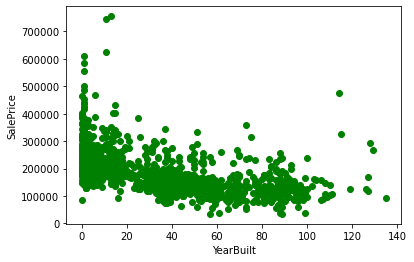

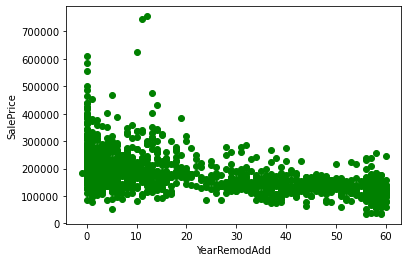

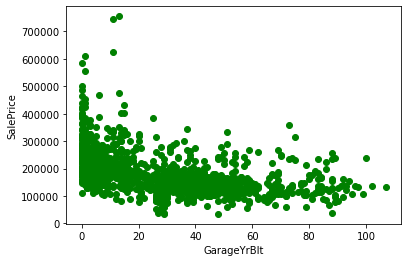

In [71]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        # Capturing the difference between year variable and year the house was sold
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'],color="green")
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

Observations:
    
1. Newer houses have higher price.

2. Newer house remodeling have higher prices 

3. Newer garage construction have higher price.

Text(0.5, 1.0, 'Mean House Price')

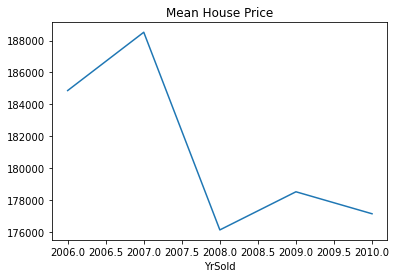

In [72]:
df.groupby('YrSold')['SalePrice'].mean().plot()
plt.title("Mean House Price")

Observation:
    
evidently there was a crash in the real estate towards the end of 2007 and begin of 2008. This could be a result of economic crisis during the period. While a peak was noticed between 2006 and 2007.

Text(0.5, 1.0, 'Over all material and finish')

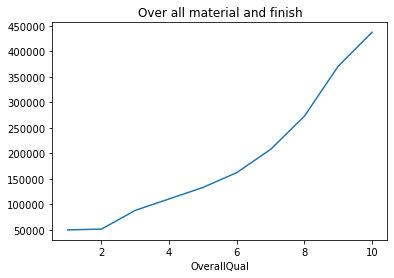

In [73]:
df.groupby('OverallQual')['SalePrice'].mean().plot()
plt.title("Over all material and finish")

Observation:
    
As the Over quality of of the house increases the price also increses.

Text(0.5, 1.0, 'Full Bathroom')

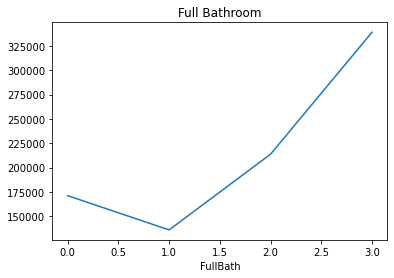

In [74]:
df.groupby('FullBath')['SalePrice'].mean().plot()
plt.title("Full Bathroom")

Observation:
    
Full bathroom over 1.0 contributes in linear increase in price.

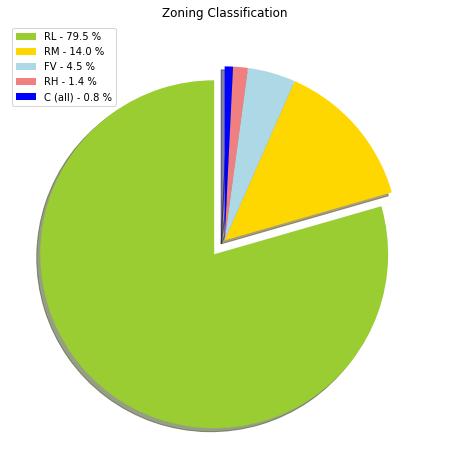

In [75]:
plt.figure(figsize=(8,8))
labels = df["MSZoning"].unique()
sizes = df["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()

Observation:
    
1. RL consumes over 79.5% of the total.

2. C only contributes 0.8% 

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

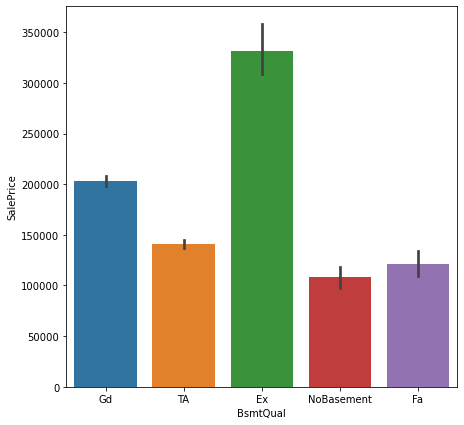

In [76]:
plt.subplots(figsize=(7,7))
sns.barplot(x="BsmtQual", y="SalePrice", data=df)

Observation:
    
1. Most houses having excellent and good basement have higher prices.

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

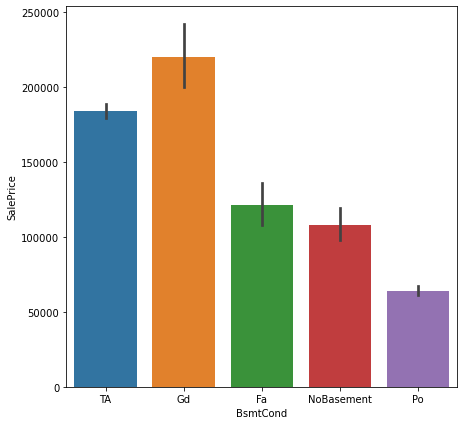

In [77]:
plt.subplots(figsize=(7,7))
sns.barplot(x="BsmtCond", y="SalePrice", data=df)

Observation:
    
1. Most basements are good/typical that contribute to higher price.

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

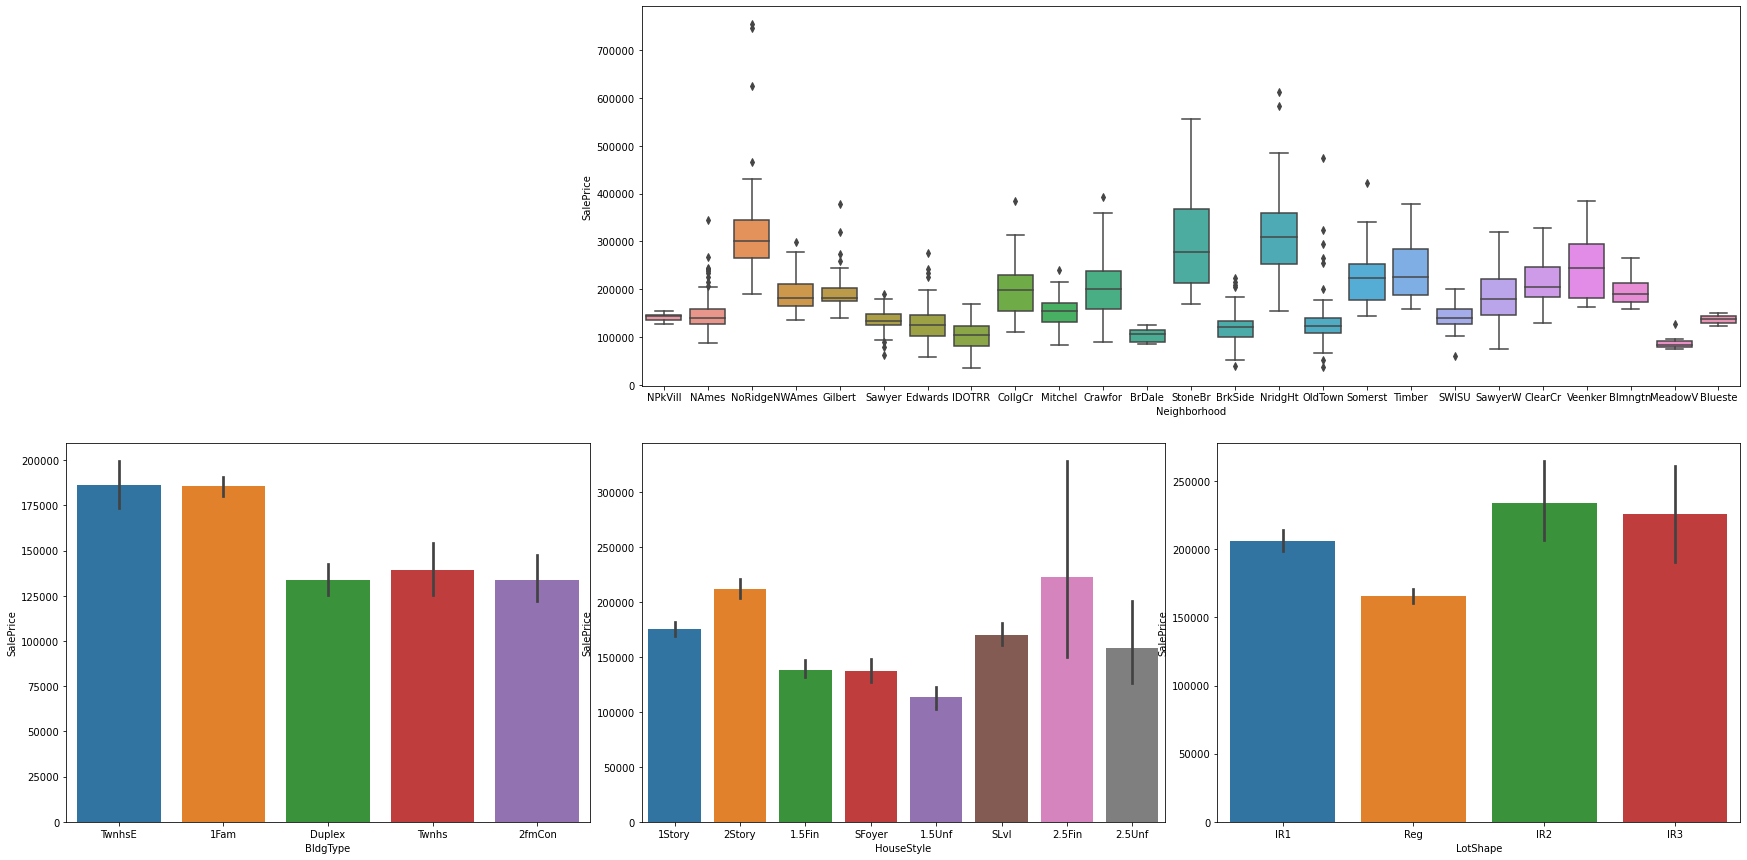

In [78]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))


plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="SalePrice", data=df)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="SalePrice", data=df)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="SalePrice", data=df)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="SalePrice", data=df)

Observations:
    
1. 2.5 storey dwelling are priced higher.

2. Townhouse end unit are priced higher.

3. slightly irregular properties are priced higher.

Text(0.5, 1.0, 'observations of average price')

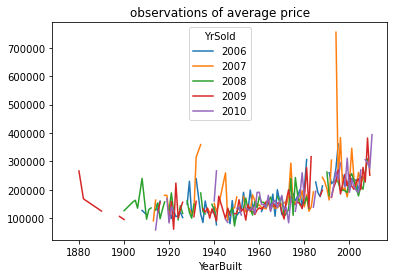

In [79]:
df_m=df.groupby(by=["YearBuilt","YrSold"]).mean()
p=df_m["SalePrice"]
p.unstack().plot(kind="line")
plt.title("observations of average price")

Observation:
    The year 2007 has seen a sharp peak.

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

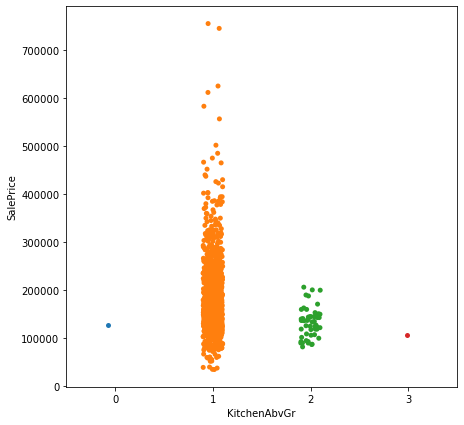

In [80]:
plt.subplots(figsize=(7,7))
sns.stripplot(x="KitchenAbvGr", y="SalePrice", data=df, size = 5, jitter = True)

Observation:
    
Most kitchens have 1 kitchen above grade.

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

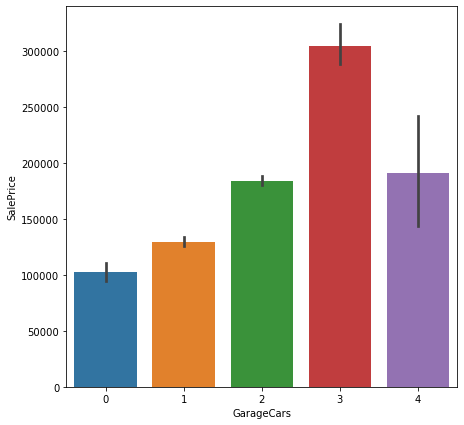

In [81]:
plt.subplots(figsize=(7,7))
sns.barplot(x="GarageCars", y="SalePrice", data=df)

Observations:
    
    A noteable increase in the price as the garage capacity increases. At 4 cars there seems to be a dip in price.

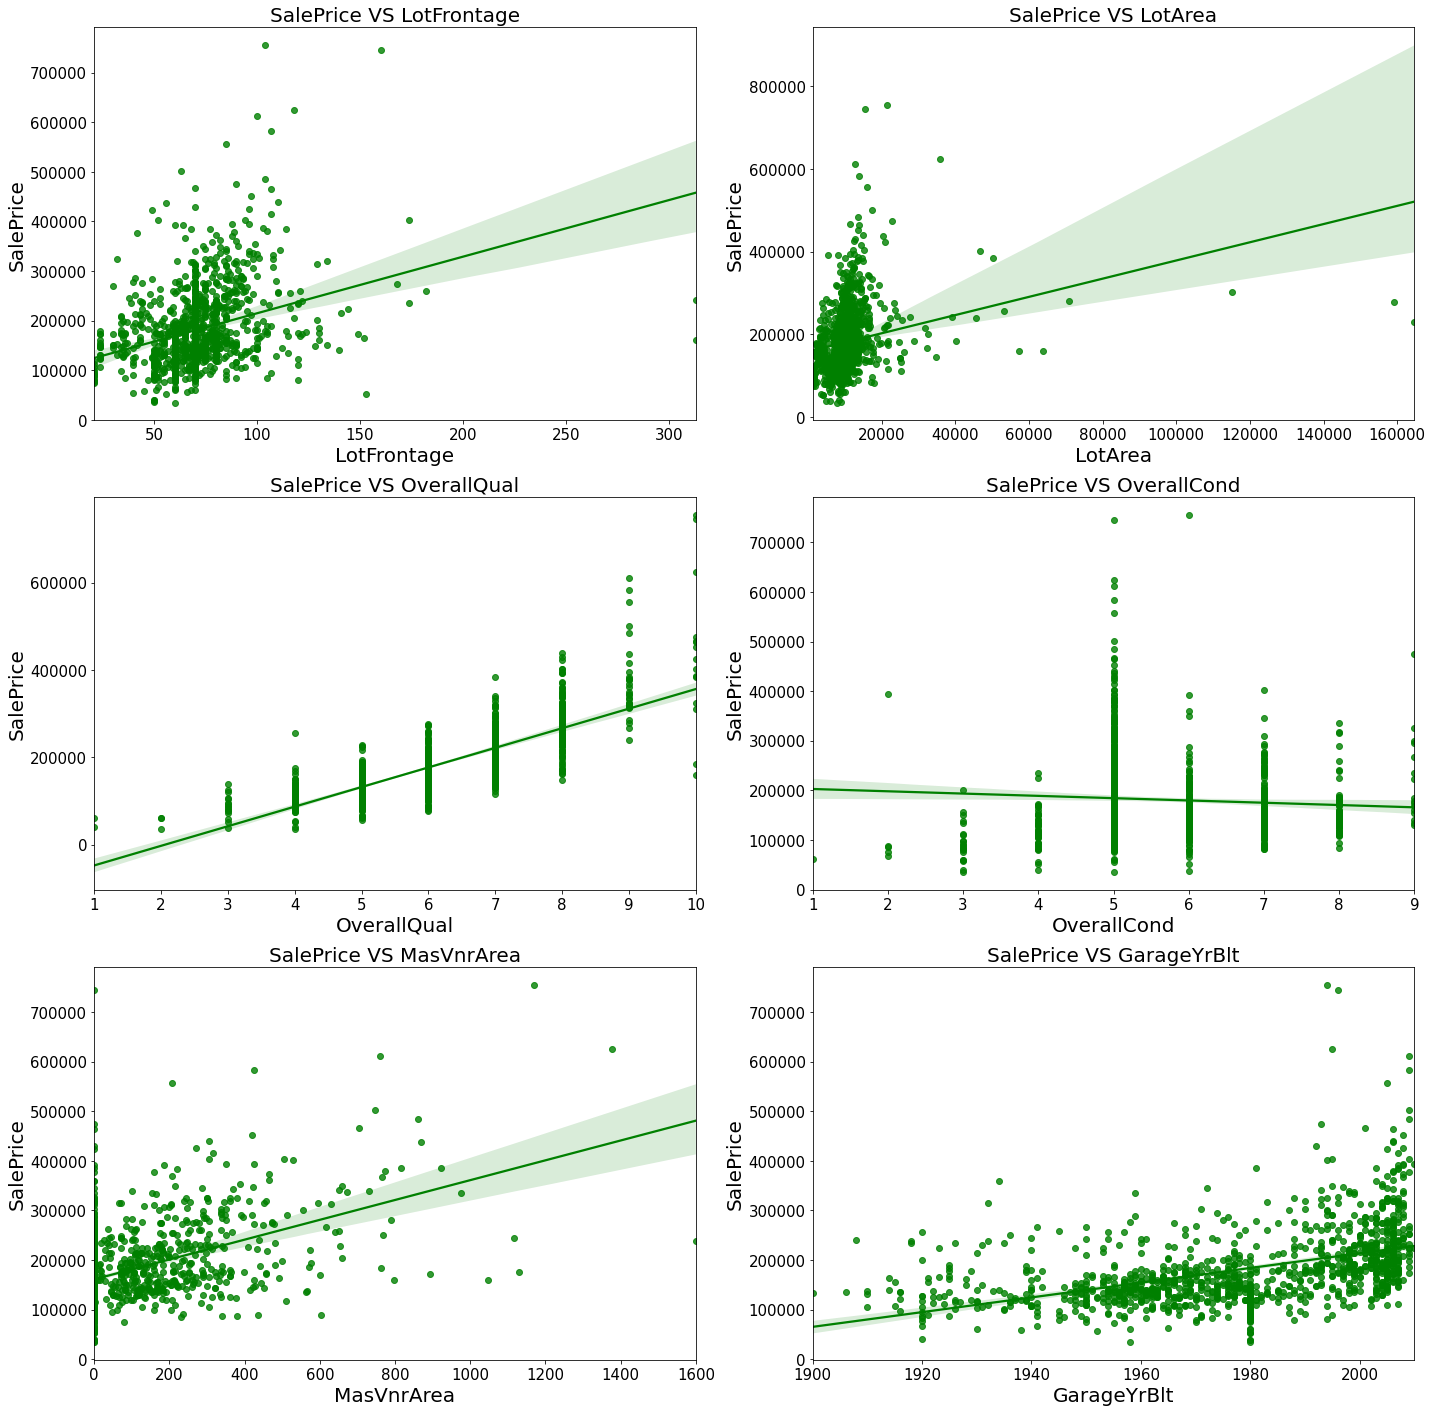

In [83]:
col=["LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","GarageYrBlt"]

plt.figure(figsize=(20,130))
for i in range(len(col)):
    plt.subplot(20,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['SalePrice'],color="g")
    plt.title(f"SalePrice VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()


Observations:
    
1. As linear feet of street increses the price increases.


2. As lot area increses there is an increse in the sale price.


3. As overall quality increses the sale prices increses. 


4. With increse in garage built year there isn't a sharp increase in the price.


5. At overall condition 5 (average) has the highest sale price while the consecutive condition see a declined trend.

# Label encoder

In [84]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_features:
    df[i]=le.fit_transform(df[i])
df

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0            120         3         70.0     4928       1      1         0   
1             20         3         95.0    15865       1      1         0   
2             60         3         92.0     9920       1      1         0   
3             20         3        105.0    11751       1      1         0   
4             20         3         70.0    16635       1      1         0   
...          ...       ...          ...      ...     ...    ...       ...   
1163          20         3         70.0     9819       1      1         0   
1164          20         3         67.0     8777       1      1         3   
1165         160         3         24.0     2280       1      1         3   
1166          70         0         50.0     8500       1      2         3   
1167          60         3         70.0     7861       1      1         0   

      LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
0               3          0          4  ...         0       3      4   
1               3          0          4  ...         0       3      4   
2               3          0          1  ...         0       3      4   
3               3          0          4  ...         0       3      2   
4               3          0          2  ...         0       3      4   
...           ...        ...        ...  ...       ...     ...    ...   
1163            3          0          4  ...         0       3      2   
1164            3          0          4  ...         0       3      2   
1165            3          0          2  ...         0       3      4   
1166            3          0          4  ...         0       3      2   
1167            3          0          4  ...         0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0               1        0       2    2007         8              4     128000  
1               1        0      10    2007         8              4     268000  
2               1        0       6    2007         8              4     269790  
3               1        0       1    2010         0              4     190000  
4               1        0       6    2009         8              4     215000  
...           ...      ...     ...     ...       ...            ...        ...  
1163            1        0       2    2010         8              4     122000  
1164            1        0       5    2009         8              4     108000  
1165            1        0       7    2009         8              4     148500  
1166            1        0       7    2008         8              4      40000  
1167            1        0       6    2006         8              4     183200  

[1168 rows x 80 columns]

In [85]:
categorical_features_test=[feature for feature in dff.columns if dff[feature].dtypes=='O']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_features_test:
    dff[i]=le.fit_transform(dff[i])
dff

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0            20         2         86.0    14157       1      1         0   
1           120         2         65.0     5814       1      1         0   
2            20         2         65.0    11838       1      1         3   
3            70         2         75.0    12000       1      1         3   
4            60         2         86.0    14598       1      1         0   
..          ...       ...          ...      ...     ...    ...       ...   
287          20         2         78.0    10206       1      1         3   
288          20         2         57.0     9245       1      1         1   
289          20         2         65.0    11241       1      1         0   
290          50         3         50.0     5000       1      1         3   
291         160         3         21.0     1953       1      1         3   

     LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
0              1          0          0  ...            0         0       0   
1              3          0          1  ...            0         0       0   
2              3          0          4  ...            0         0       0   
3              0          0          4  ...            0         0       0   
4              3          0          1  ...            0         0       0   
..           ...        ...        ...  ...          ...       ...     ...   
287            3          0          4  ...            0         0       0   
288            3          0          4  ...            0         0       0   
289            3          0          1  ...            0         0       0   
290            3          0          0  ...            0         0       0   
291            3          0          4  ...            0         0       0   

     Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0        4            0        0       7    2007         5              2  
1        4            0        0       8    2009         0              0  
2        4            0        0       6    2009         5              2  
3        4            0        0       7    2009         5              2  
4        4            0        0       1    2008         5              2  
..     ...          ...      ...     ...     ...       ...            ...  
287      4            0        0      10    2008         5              2  
288      4            0        0       2    2008         5              2  
289      4            2      700       3    2010         5              2  
290      4            0        0      10    2006         5              2  
291      4            0        0       6    2006         5              2  

[292 rows x 79 columns]

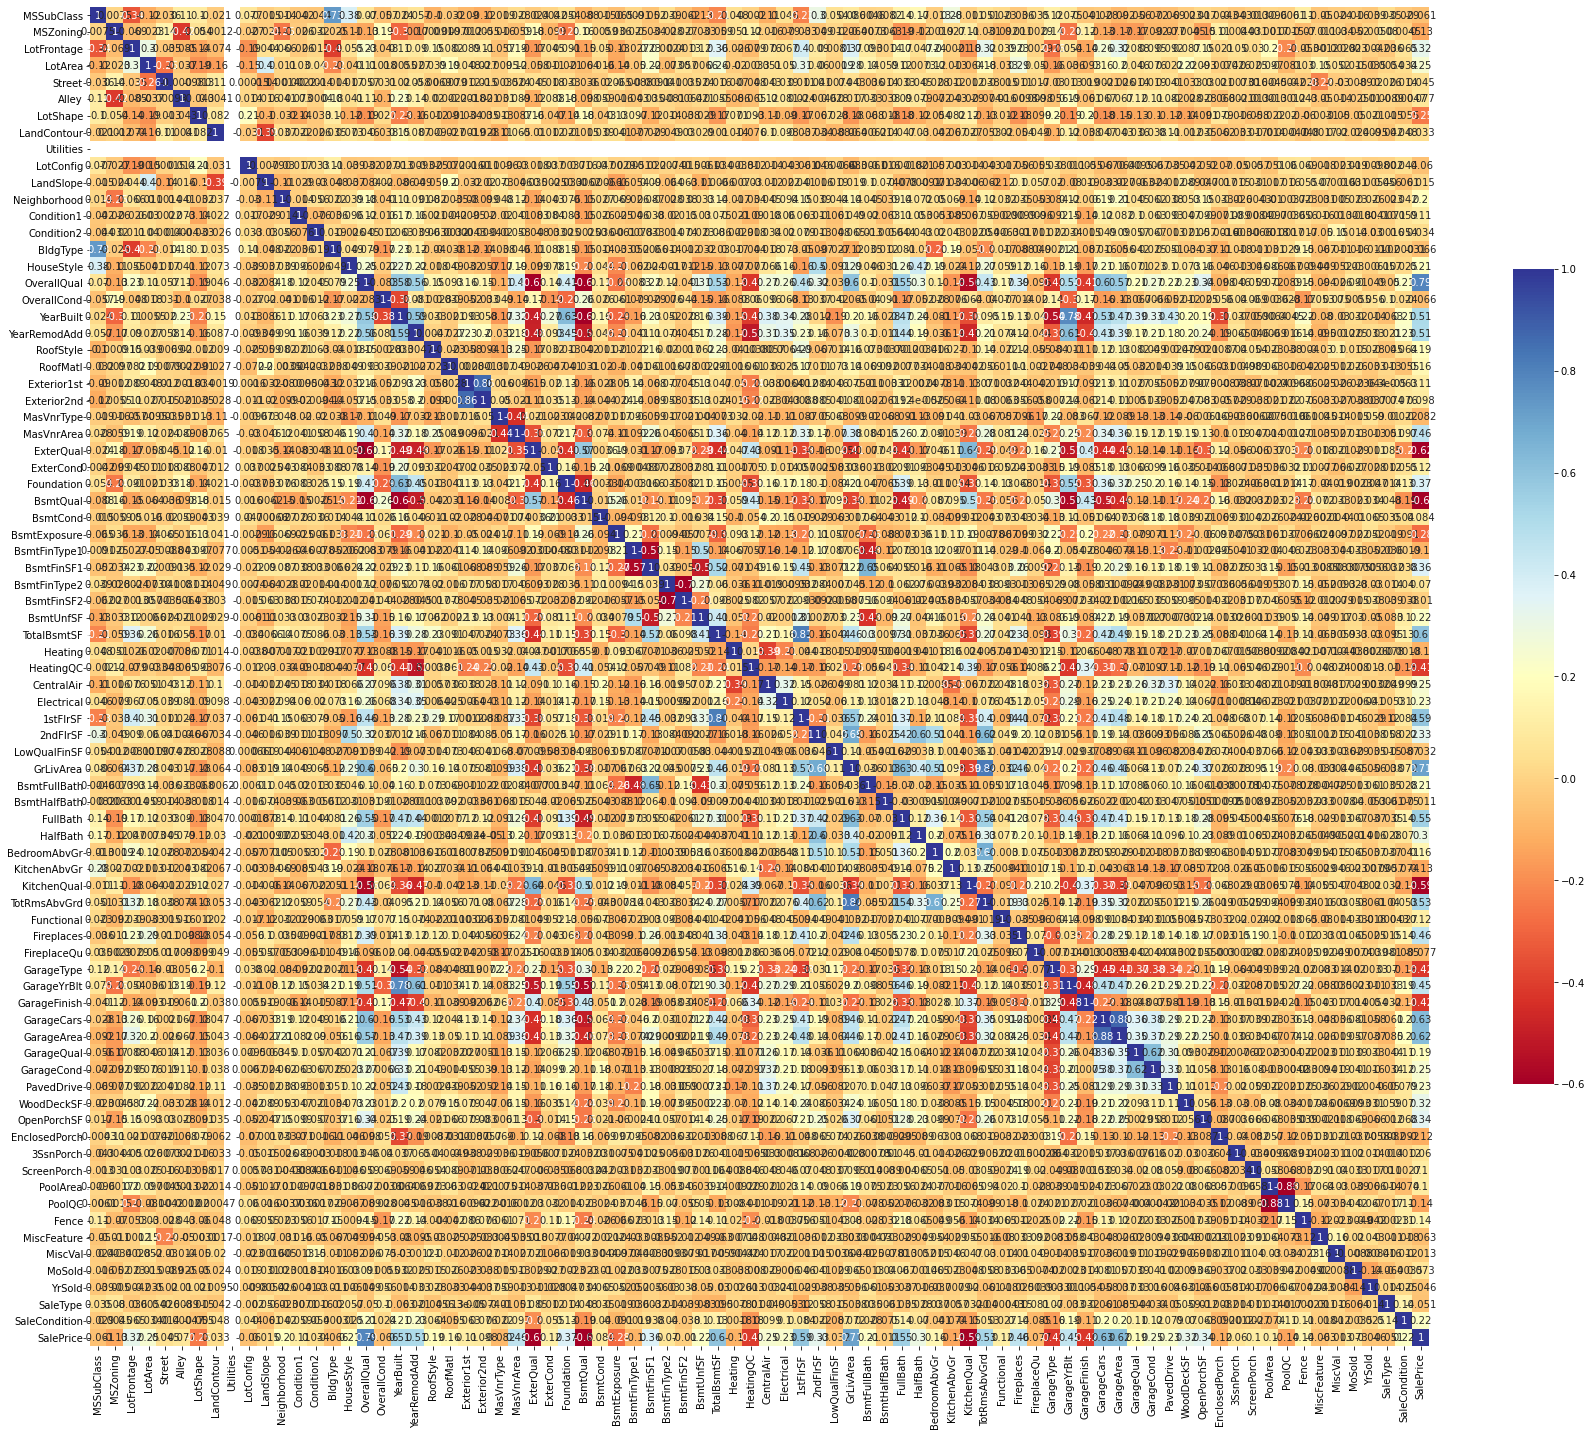

In [86]:
corr = df.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

In [87]:
df.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.007478    -0.336234 -0.124151 -0.035981   
MSZoning         0.007478  1.000000    -0.069476 -0.023328  0.140215   
LotFrontage     -0.336234 -0.069476     1.000000  0.296790 -0.035131   
LotArea         -0.124151 -0.023328     0.296790  1.000000 -0.263973   
Street          -0.035981  0.140215    -0.035131 -0.263973  1.000000   
...                   ...       ...          ...       ...       ...   
MoSold          -0.016015 -0.051646     0.022579  0.015141 -0.008860   
YrSold          -0.038595 -0.004964    -0.004162 -0.035399 -0.019635   
SaleType         0.035050  0.079854    -0.036081  0.005421  0.025920   
SaleCondition   -0.028981  0.004501     0.065439  0.034236  0.014176   
SalePrice       -0.060775 -0.133221     0.323851  0.249499  0.044753   

                  Alley  LotShape  LandContour  Utilities  LotConfig  ...  \
MSSubClass     0.107699  0.104485    -0.021387        NaN   0.076880  ...   
MSZoning      -0.415953  0.053655     0.001175        NaN  -0.027246  ...   
LotFrontage   -0.084593 -0.138975    -0.073725        NaN  -0.189317  ...   
LotArea       -0.037048 -0.189201    -0.159038        NaN  -0.152063  ...   
Street        -0.000978 -0.012941     0.105226        NaN   0.000153  ...   
...                 ...       ...          ...        ...        ...  ...   
MoSold        -0.025186 -0.050418    -0.023872        NaN   0.019084  ...   
YrSold         0.010096  0.021421     0.009499        NaN  -0.009817  ...   
SaleType       0.008918 -0.015161    -0.041763        NaN  -0.002039  ...   
SaleCondition -0.000467 -0.054905     0.047715        NaN   0.043692  ...   
SalePrice      0.076717 -0.248171     0.032836        NaN  -0.060452  ...   

               PoolArea    PoolQC     Fence  MiscFeature   MiscVal    MoSold  \
MSSubClass     0.009583 -0.006109  0.112138    -0.049530 -0.023503 -0.016015   
MSZoning      -0.001663  0.001533 -0.070105    -0.011200  0.003416 -0.051646   
LotFrontage    0.195973 -0.207995 -0.052882    -0.001235 -0.002830  0.022579   
LotArea        0.097107 -0.081488  0.030193     0.147387  0.051679  0.015141   
Street         0.004505 -0.004151 -0.027677    -0.222166 -0.030354 -0.008860   
...                 ...       ...       ...          ...       ...       ...   
MoSold        -0.038624  0.041533 -0.004882     0.020095 -0.008773  1.000000   
YrSold        -0.066063  0.067465 -0.041525     0.042696 -0.008439 -0.144536   
SaleType       0.014047 -0.016640 -0.000235    -0.011484  0.015900 -0.063667   
SaleCondition -0.074354  0.107767  0.107588    -0.018463  0.012178 -0.003462   
SalePrice      0.103280 -0.141136  0.143922    -0.063477 -0.013071  0.072764   

                 YrSold  SaleType  SaleCondition  SalePrice  
MSSubClass    -0.038595  0.035050      -0.028981  -0.060775  
MSZoning      -0.004964  0.079854       0.004501  -0.133221  
LotFrontage   -0.004162 -0.036081       0.065439   0.323851  
LotArea       -0.035399  0.005421       0.034236   0.249499  
Street        -0.019635  0.025920       0.014176   0.044753  
...                 ...       ...            ...        ...  
MoSold        -0.144536 -0.063667      -0.003462   0.072764  
YrSold         1.000000  0.013606       0.024505  -0.045508  
SaleType       0.013606  1.000000       0.143557  -0.050851  
SaleCondition  0.024505  0.143557       1.000000   0.217687  
SalePrice     -0.045508 -0.050851       0.217687   1.000000  

[80 rows x 80 columns]

In [88]:
df.describe()

MSSubClass     MSZoning  LotFrontage        LotArea       Street  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean     56.767979     3.013699    70.807363   10484.749144     0.996575   
std      41.940650     0.633120    22.440317    8957.442311     0.058445   
min      20.000000     0.000000    21.000000    1300.000000     0.000000   
25%      20.000000     3.000000    60.000000    7621.500000     1.000000   
50%      50.000000     3.000000    70.000000    9522.500000     1.000000   
75%      70.000000     3.000000    79.250000   11515.500000     1.000000   
max     190.000000     4.000000   313.000000  164660.000000     1.000000   

             Alley     LotShape  LandContour  Utilities    LotConfig  ...  \
count  1168.000000  1168.000000  1168.000000     1168.0  1168.000000  ...   
mean      0.995719     1.938356     2.773973        0.0     3.004281  ...   
std       0.256832     1.412262     0.710027        0.0     1.642667  ...   
min       0.000000     0.000000     0.000000        0.0     0.000000  ...   
25%       1.000000     0.000000     3.000000        0.0     2.000000  ...   
50%       1.000000     3.000000     3.000000        0.0     4.000000  ...   
75%       1.000000     3.000000     3.000000        0.0     4.000000  ...   
max       2.000000     3.000000     3.000000        0.0     4.000000  ...   

          PoolArea       PoolQC        Fence  MiscFeature       MiscVal  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean      3.448630     2.988870     3.475171     1.070205     47.315068   
std      44.896939     0.157245     1.112090     0.377430    543.264432   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     3.000000     4.000000     1.000000      0.000000   
50%       0.000000     3.000000     4.000000     1.000000      0.000000   
75%       0.000000     3.000000     4.000000     1.000000      0.000000   
max     738.000000     3.000000     4.000000     4.000000  15500.000000   

            MoSold       YrSold     SaleType  SaleCondition      SalePrice  
count  1168.000000  1168.000000  1168.000000    1168.000000    1168.000000  
mean      6.344178  2007.804795     7.465753       3.768836  181477.005993  
std       2.686352     1.329738     1.619459       1.112208   79105.586863  
min       1.000000  2006.000000     0.000000       0.000000   34900.000000  
25%       5.000000  2007.000000     8.000000       4.000000  130375.000000  
50%       6.000000  2008.000000     8.000000       4.000000  163995.000000  
75%       8.000000  2009.000000     8.000000       4.000000  215000.000000  
max      12.000000  2010.000000     8.000000       5.000000  755000.000000  

[8 rows x 80 columns]

# Checking outliers and  skewness

In [89]:
df.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.733440
LotArea          10.659285
Street          -17.021969
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 80, dtype: float64

In [90]:
dff.skew()

MSSubClass        1.358597
MSZoning          0.187174
LotFrontage       0.499491
LotArea          12.781805
Street          -12.020386
                   ...    
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
SaleType         -5.489874
SaleCondition    -2.161104
Length: 79, dtype: float64

In [91]:
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)

In [92]:
numerical_columns_test=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]!='object':
        numerical_columns_test.append(i)

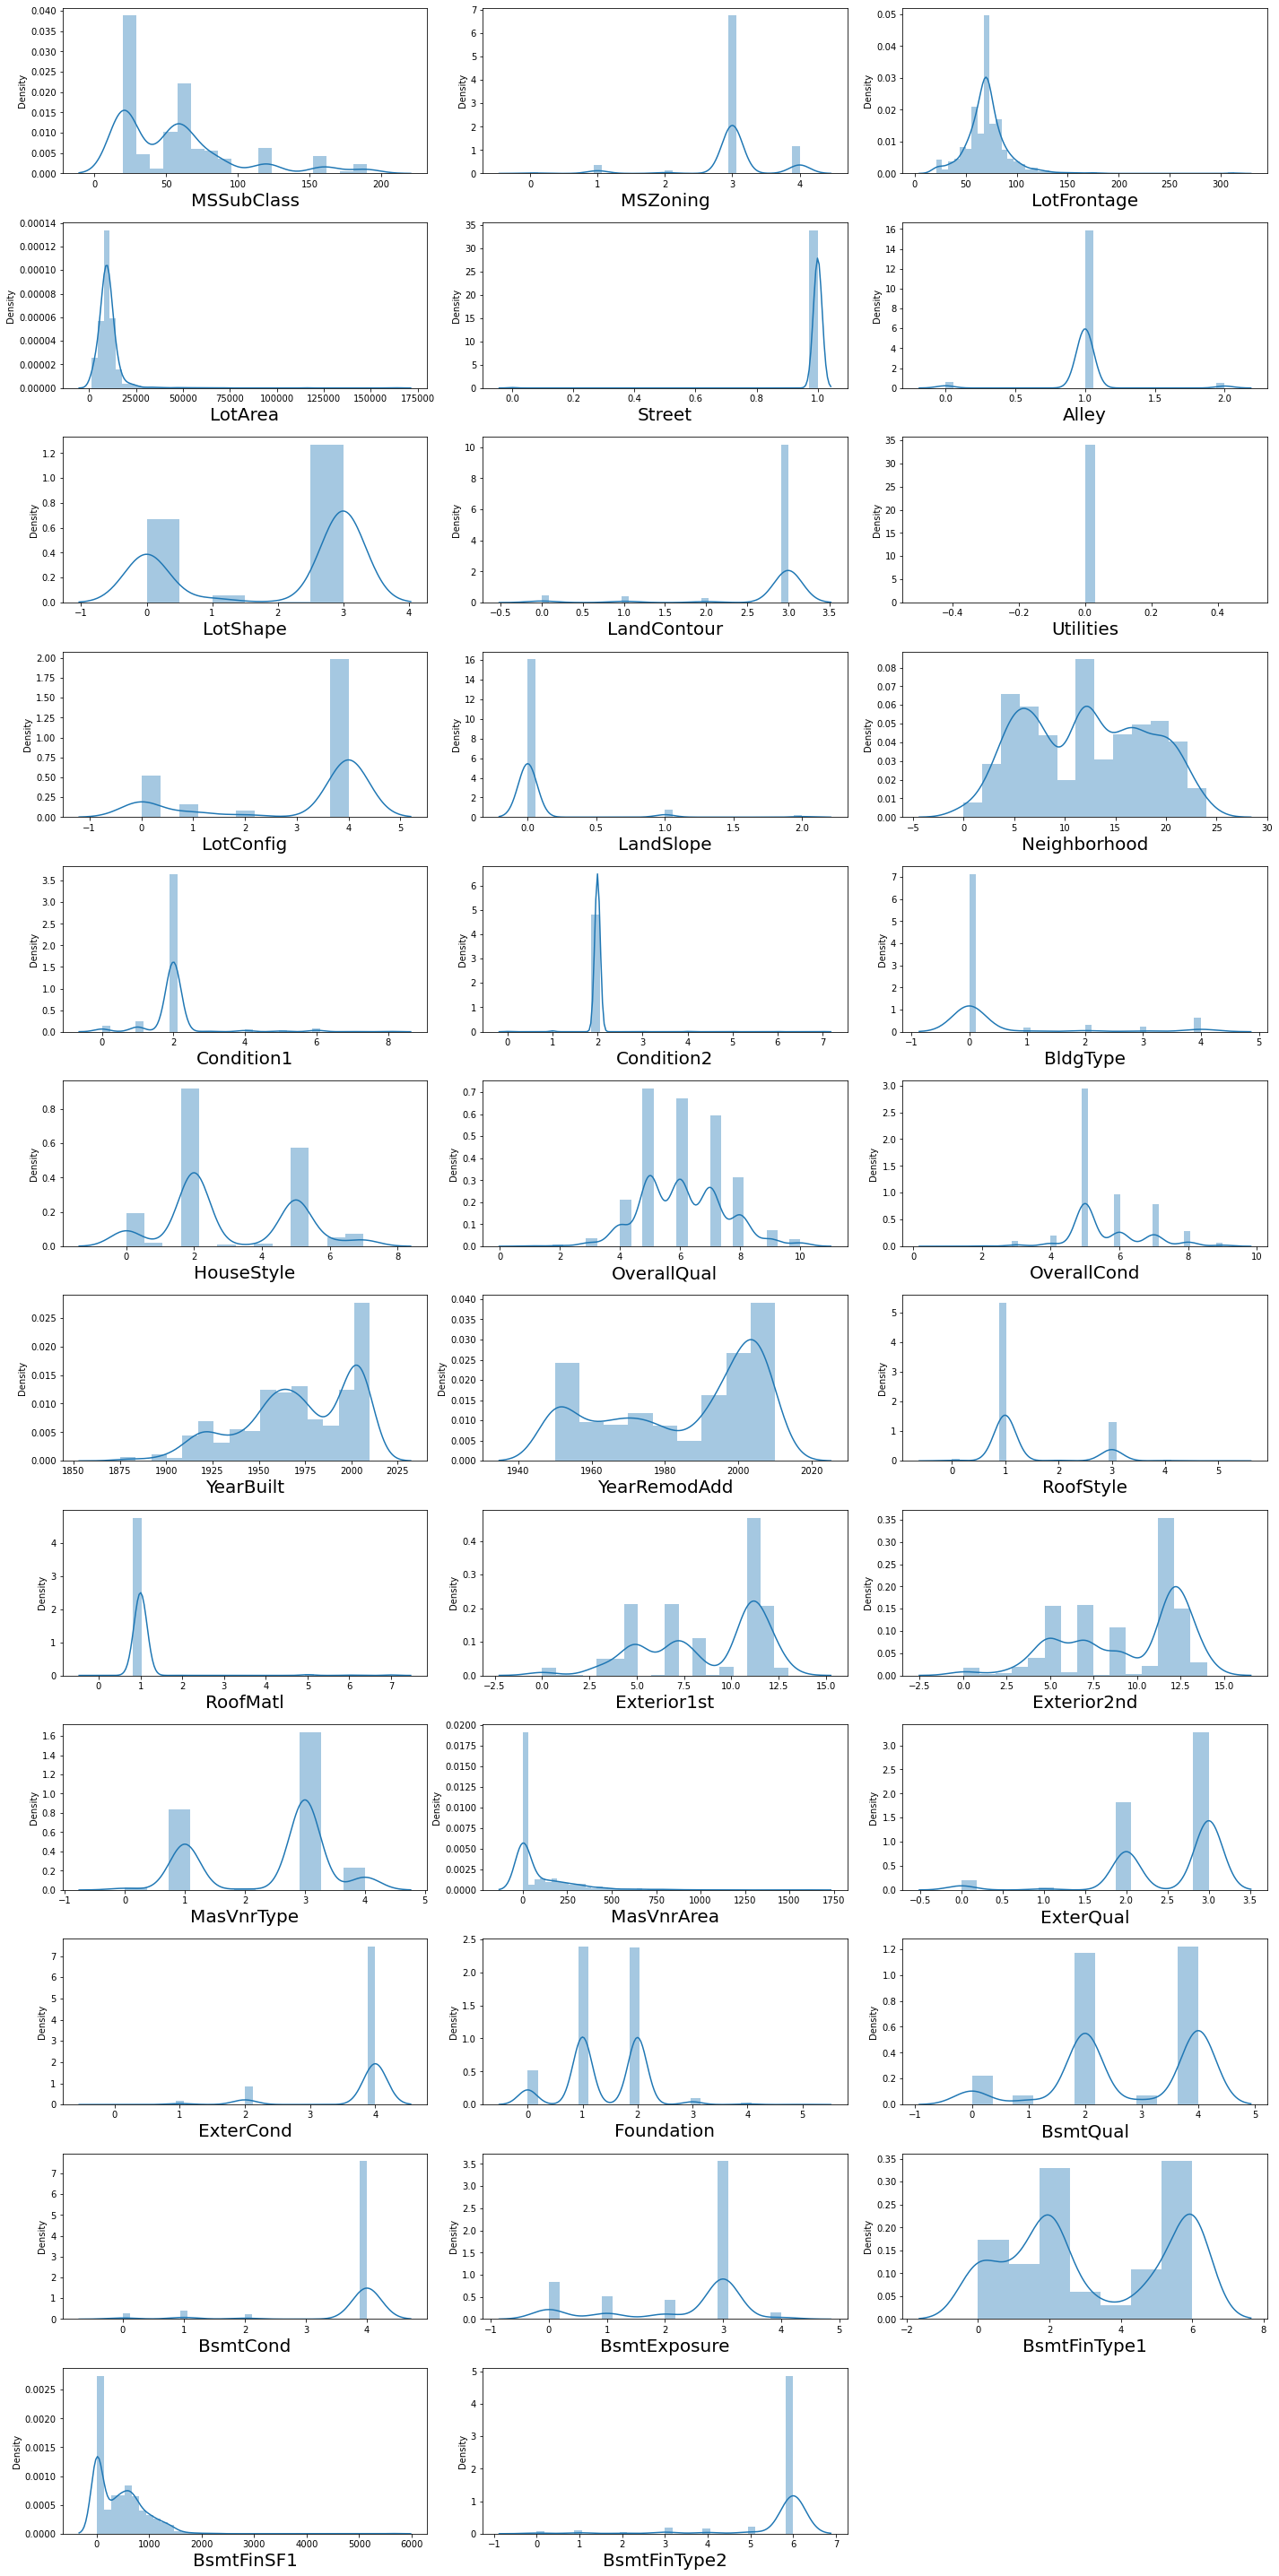

In [93]:
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=35:
        ax = plt.subplot(12,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

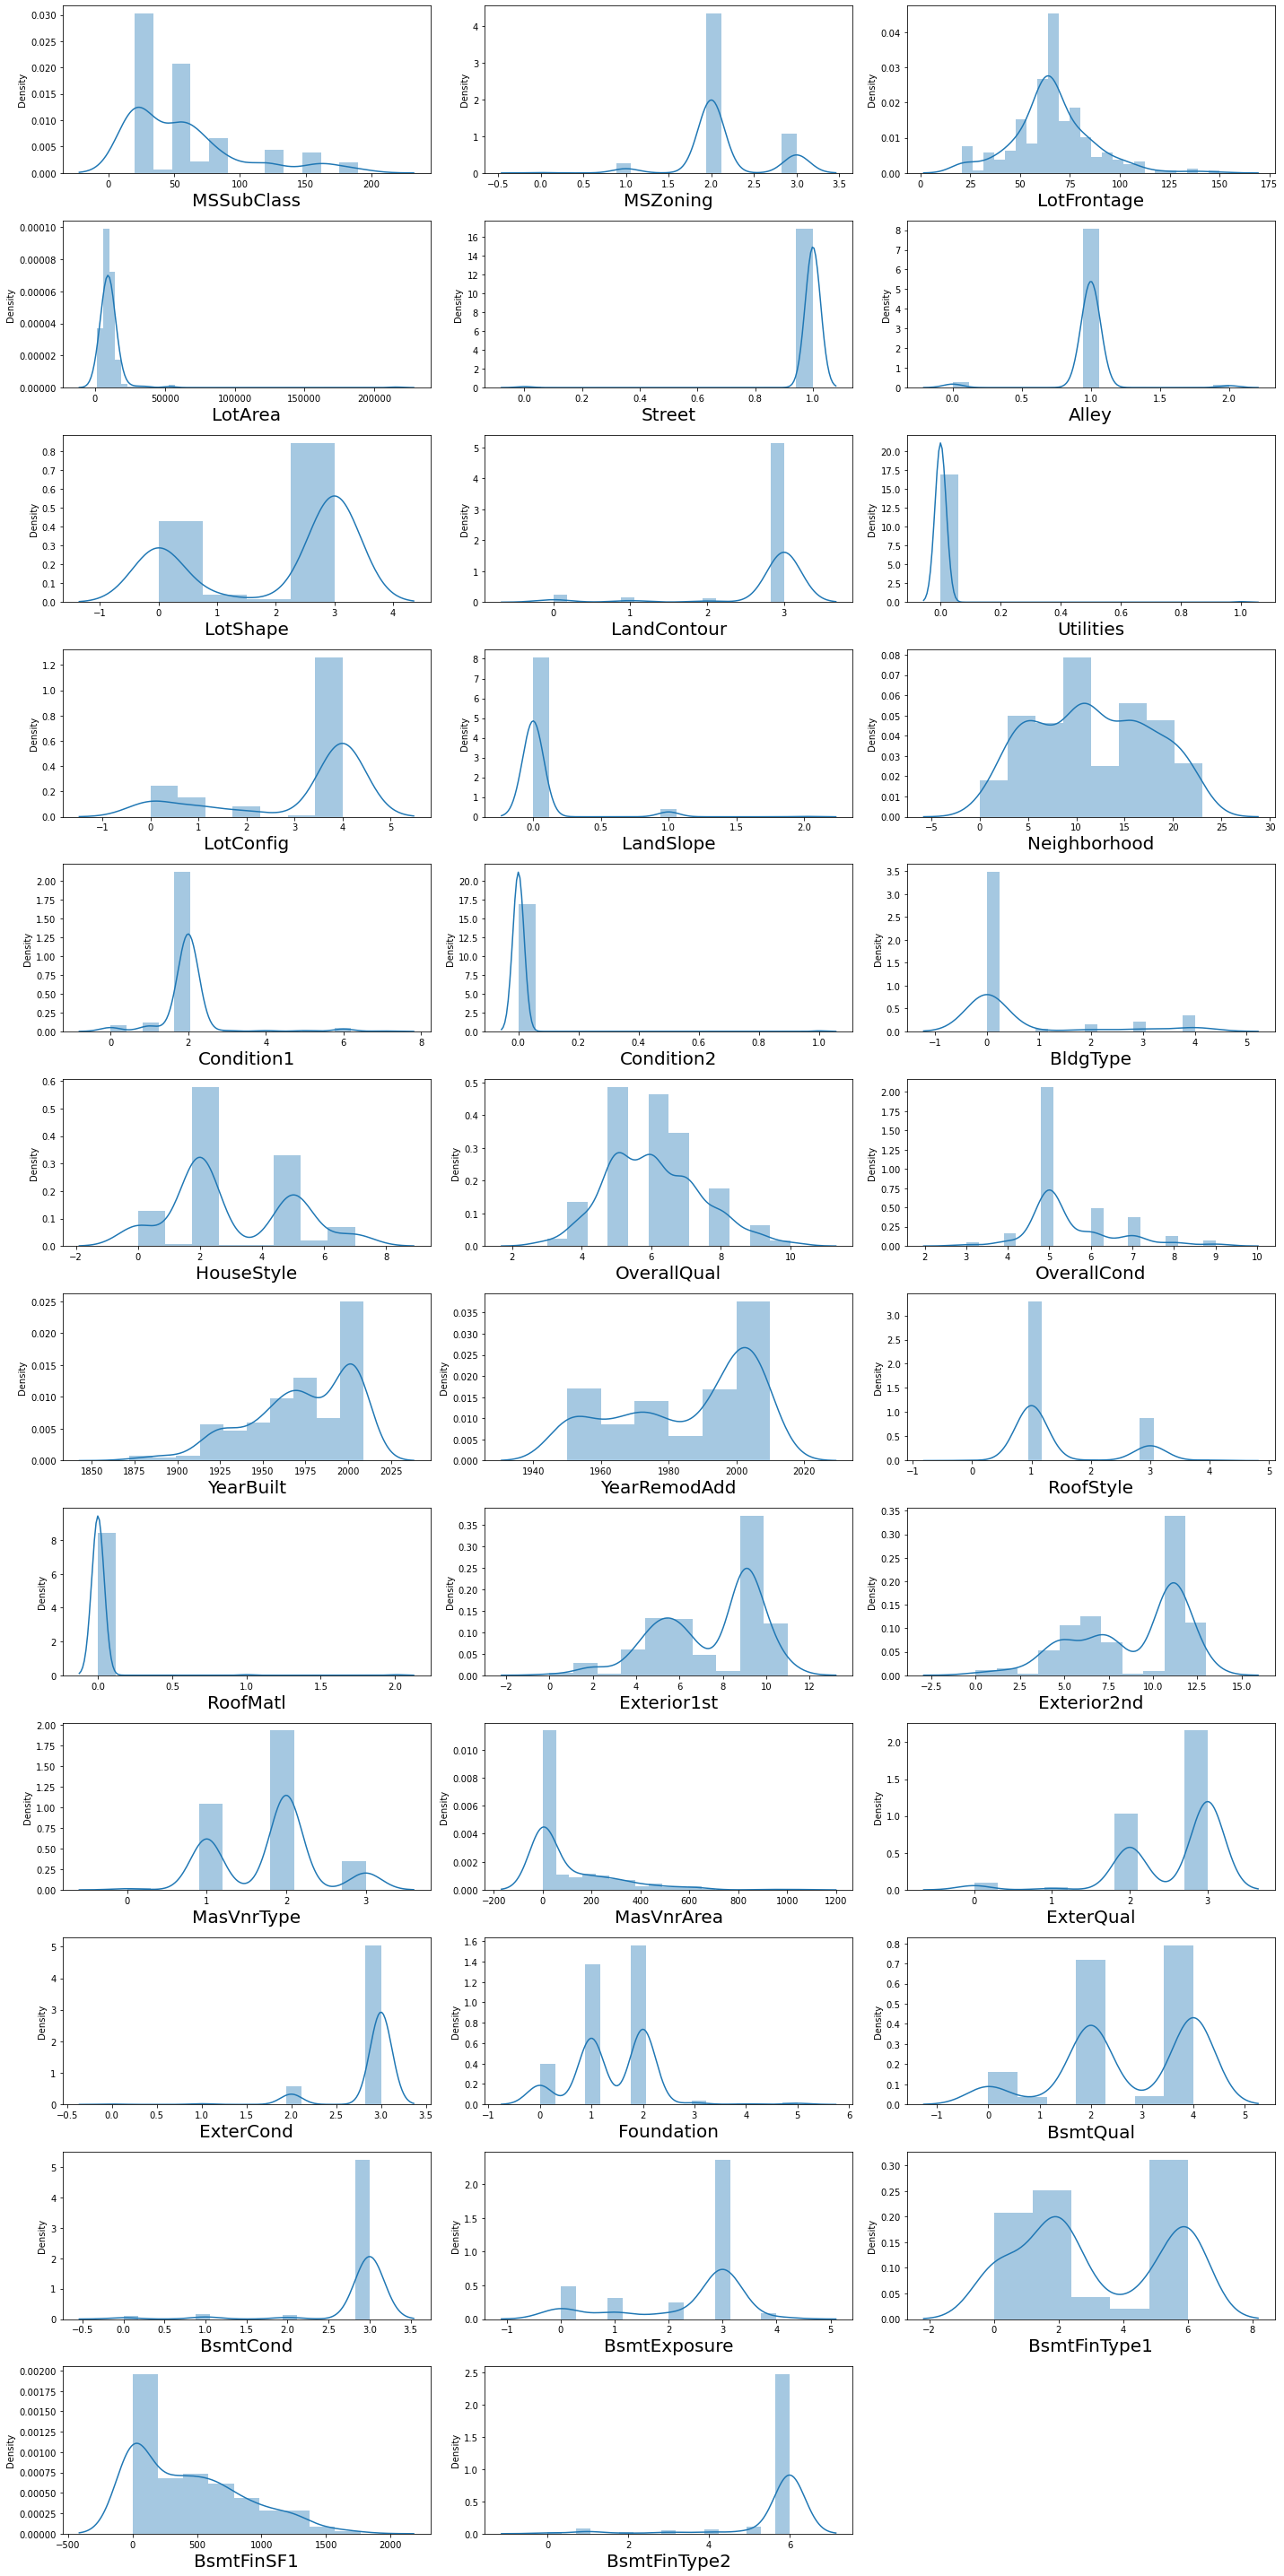

In [94]:
plt.figure(figsize = (20,40))
plotnumber = 1
for column in dff[numerical_columns_test]:
    if plotnumber <=35:
        ax = plt.subplot(12,3,plotnumber)
        sns.distplot(dff[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

Observation:
    
There is skewness present in all features.

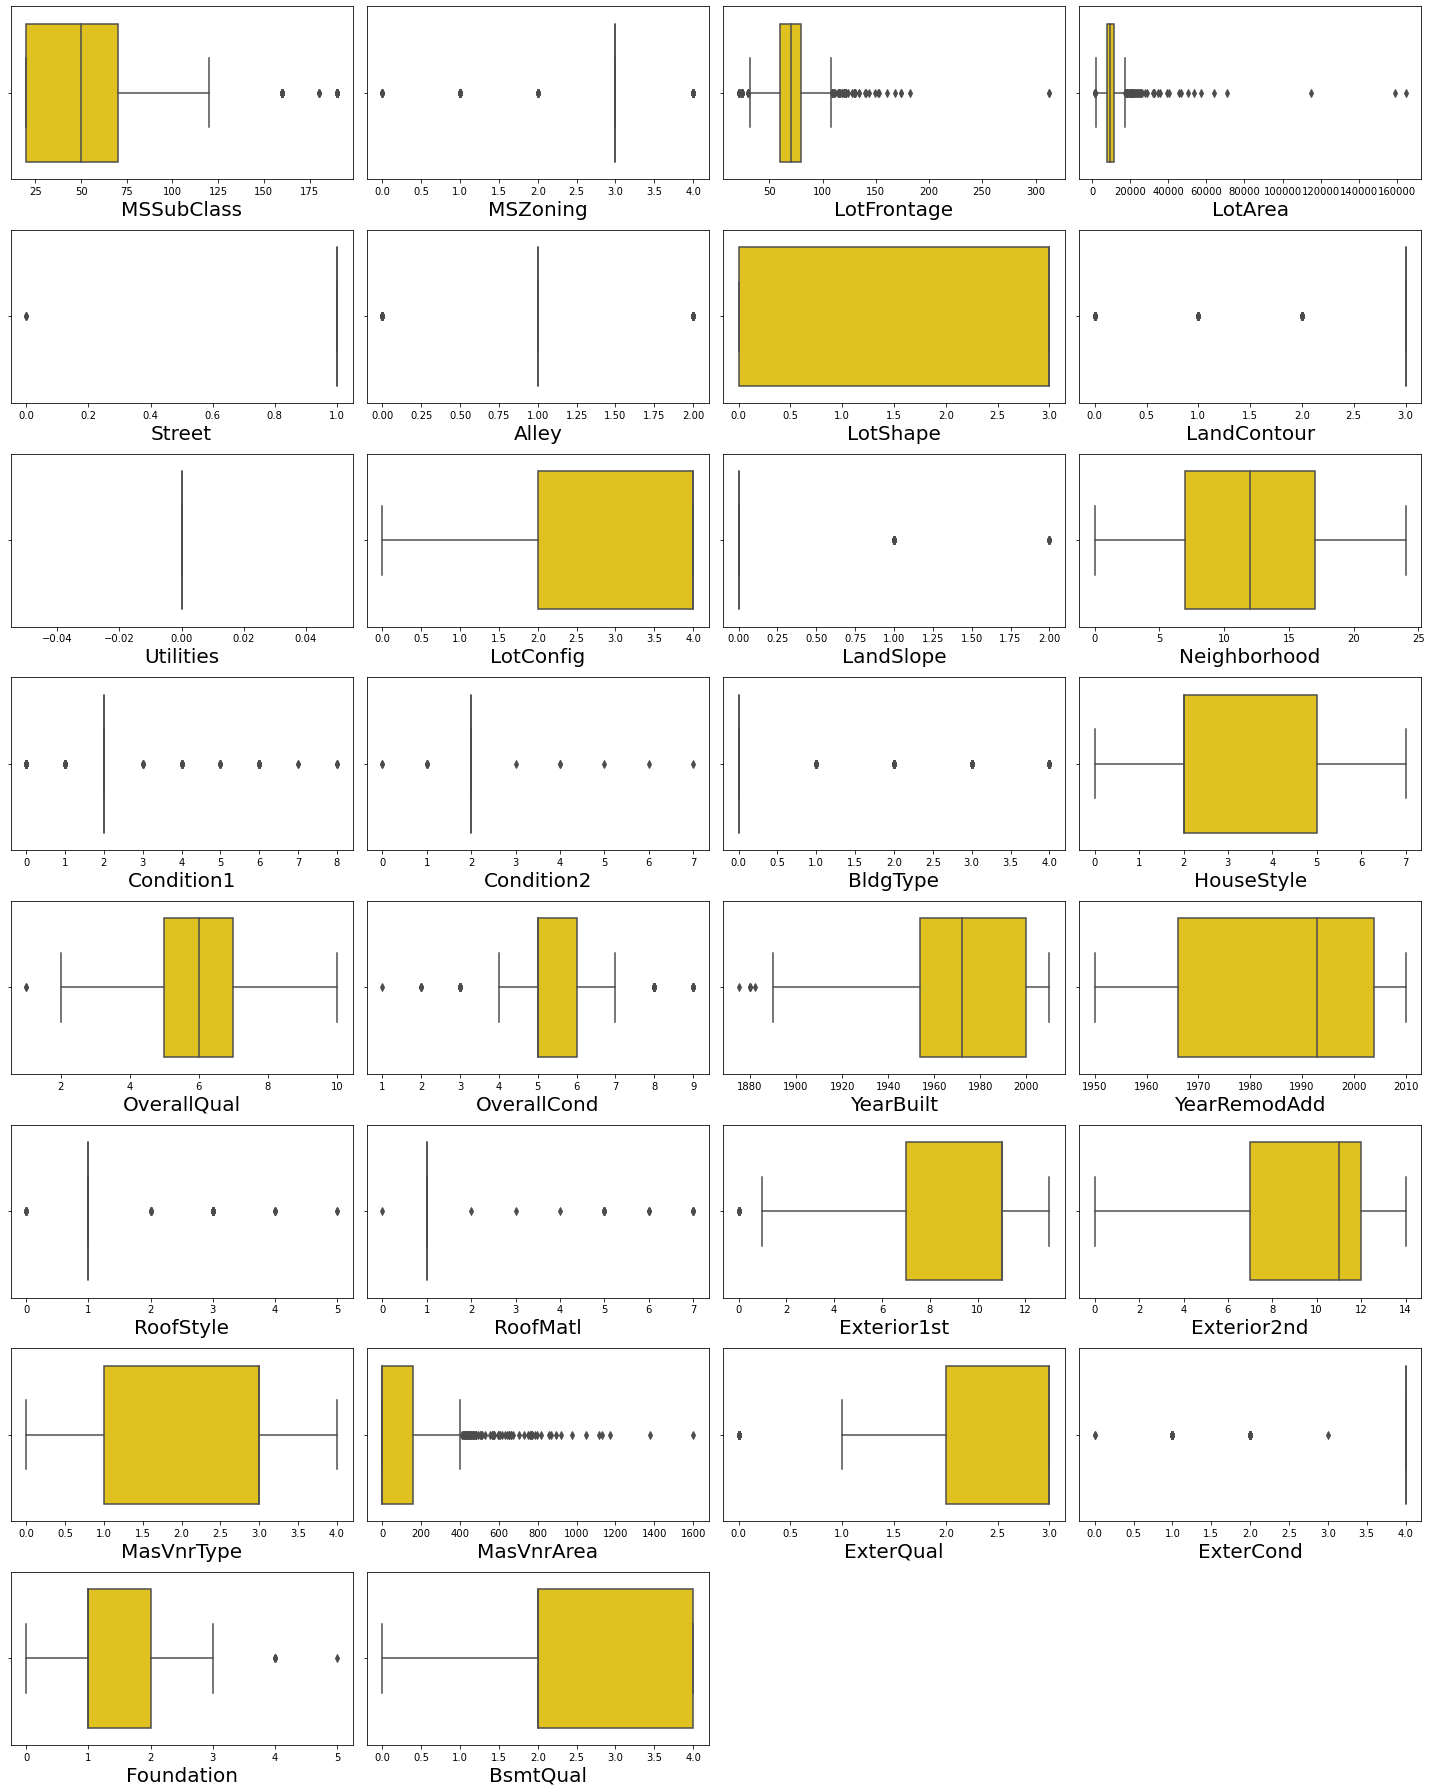

In [95]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

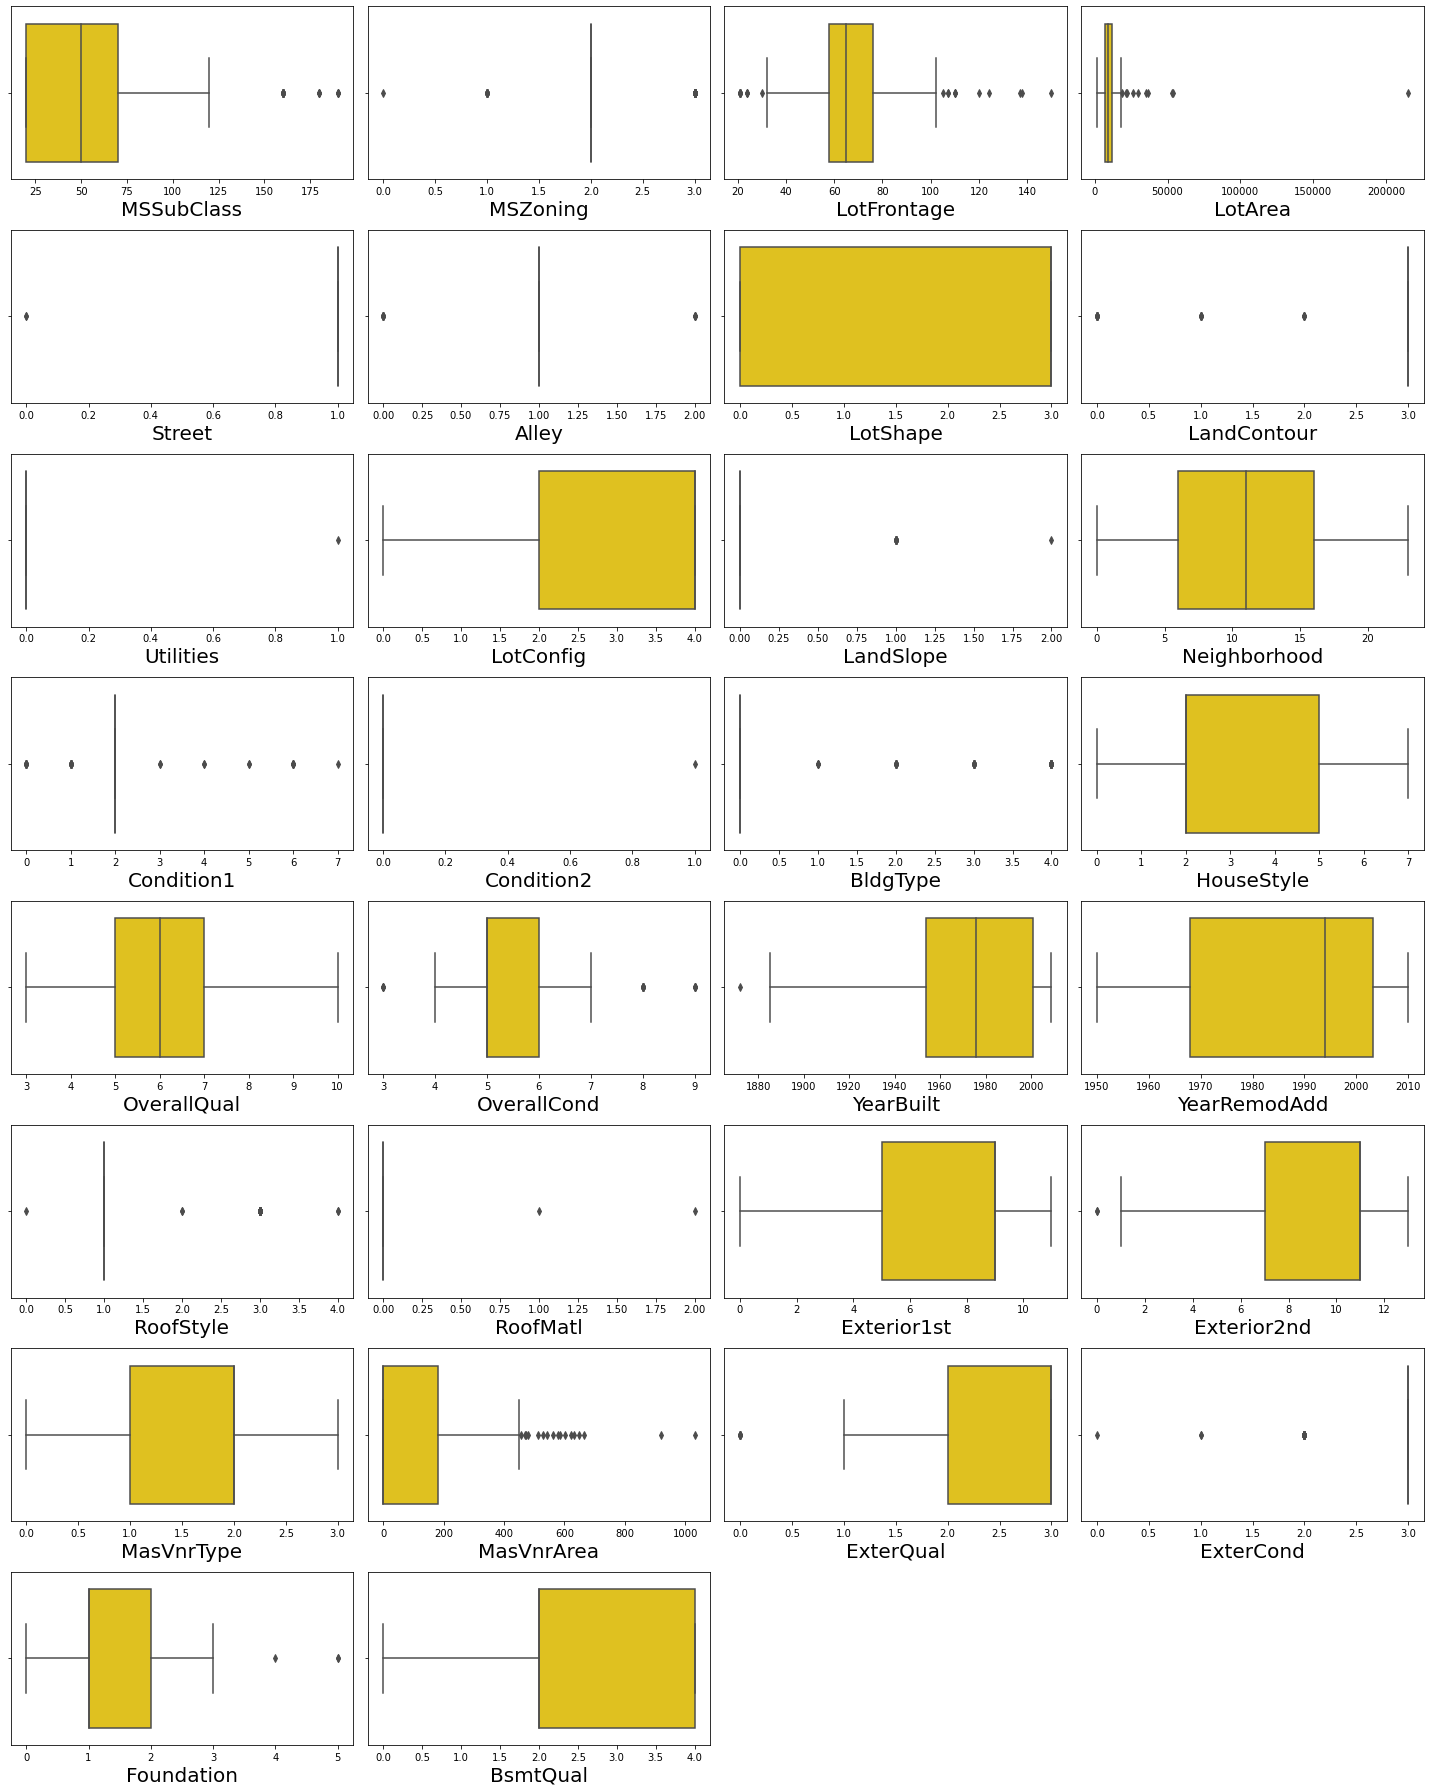

In [96]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns_test:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(dff[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Data cleaning 

Removing outliers

In [97]:
features=df[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF']]
features_test=dff[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF']]

In [98]:
import scipy
from scipy.stats import zscore 
z=np.abs(zscore(features))
z.shape

(1168, 19)

In [99]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0         120         3         70.0     4928       1      1         0   
1          20         3         95.0    15865       1      1         0   
2          60         3         92.0     9920       1      1         0   
3          20         3        105.0    11751       1      1         0   
5          60         3         58.0    14054       1      1         0   

   LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
0            3          0          4  ...         0       3      4   
1            3          0          4  ...         0       3      4   
2            3          0          1  ...         0       3      4   
3            3          0          4  ...         0       3      2   
5            3          0          4  ...         0       3      4   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            1        0       2    2007         8              4     128000  
1            1        0      10    2007         8              4     268000  
2            1        0       6    2007         8              4     269790  
3            1        0       1    2010         0              4     190000  
5            1        0      11    2006         6              5     219210  

[5 rows x 80 columns]

In [100]:
df_new.shape

(957, 80)

In [101]:
df.shape

(1168, 80)

In [102]:
#dataloss 
(1168-957)/1168*100

18.065068493150687

Data loss is more than 10%

In [103]:
Q1= features.quantile(0.25)
Q3=features.quantile(0.75)
IQR=Q3-Q1
IQR

LotFrontage       19.25
LotArea         3894.00
MasVnrArea       160.00
BsmtFinSF1       714.50
BsmtUnfSF        600.00
TotalBsmtSF      492.50
1stFlrSF         500.00
2ndFlrSF         729.00
GrLivArea        651.75
BsmtFullBath       1.00
BsmtHalfBath       0.00
BedroomAbvGr       1.00
KitchenAbvGr       0.00
TotRmsAbvGrd       2.00
Fireplaces         1.00
GarageCars         1.00
GarageArea       238.00
WoodDeckSF       171.00
OpenPorchSF       70.00
dtype: float64

In [104]:
df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_1.shape

(782, 80)

In [105]:
#dataloss
(1168-782)/1168*100

33.04794520547945

The data loss is more than 10%

In [106]:
#Removing outliers using percentile method in train dataset
for col in features:
    if df[col].dtypes != 'object':
        percentile = df[col].quantile([0.01,0.98]).values
        df[col][df[col]<=percentile[0]]=percentile[0]
        df[col][df[col]>=percentile[1]]=percentile[1]

# Preprocessing 

In [107]:
#removing skewness
fea=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr','Fireplaces','WoodDeckSF','OpenPorchSF']

In [108]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [109]:
df[fea] = scaler.fit_transform(df[fea].values)
df[fea].skew()

LotArea         0.077862
MasVnrArea      0.438357
BsmtFinSF1     -0.418554
BsmtUnfSF      -0.304290
1stFlrSF       -0.000731
2ndFlrSF        0.279883
GrLivArea      -0.005974
BsmtHalfBath    3.954345
HalfBath        0.498003
KitchenAbvGr    0.000000
Fireplaces      0.076595
WoodDeckSF      0.110387
OpenPorchSF    -0.010092
dtype: float64

In [110]:
df = df.drop(["KitchenAbvGr"],axis=1)

In [111]:
dff = dff.drop(["KitchenAbvGr"],axis=1)

In [112]:
x = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

In [113]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [114]:
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)

In [115]:
#checking for multi co-linearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features       Features
0       5.196224     MSSubClass
1       1.631578       MSZoning
2       2.058492    LotFrontage
3       2.675227        LotArea
4       1.177593         Street
..           ...            ...
73      1.111035        MiscVal
74      1.090530         MoSold
75      1.106068         YrSold
76      1.133832       SaleType
77      1.217469  SaleCondition

[78 rows x 2 columns]

In [116]:
X = X.drop(["GrLivArea"],axis=1)

In [117]:
dff=dff.drop(["GrLivArea"],axis=1)

# Model building 

In [118]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [119]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8965062428472597  on Random_state  50


In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# DecisionTree Regressor

In [124]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 70.98521219681808
mean_squared_error: 1746413382.079772
mean_absolute_error: 29288.803418803418
root_mean_squared_error: 41790.11105608325

Cross validation score : 60.07149948862425

R2_Score - Cross Validation Score : 10.913712708193835


# RandomForest Regressor

In [125]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 90.04671127256715
mean_squared_error: 599093012.4047372
mean_absolute_error: 16793.267464387463
root_mean_squared_error: 24476.376619196257

Cross validation score : 82.72414647013342

R2_Score - Cross Validation Score : 7.322564802433732


# GradientBoosting Regressor

In [126]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 91.11573192554091
mean_squared_error: 534748169.12215793
mean_absolute_error: 15592.048095145745
root_mean_squared_error: 23124.622572534194

Cross validation score : 83.58436444216586

R2_Score - Cross Validation Score : 7.53136748337505


# GridSearch Cv for RandomForest Regressor

In [127]:
from sklearn.model_selection import GridSearchCV
param = {"criterion":["squared_error","absolute_error","poisson"],"max_features":["auto","sqrt","log2"],"bootstrap":[True,False],"n_estimators":[50,100,150,200]}
clf = GridSearchCV(RFR,param_grid=param)

In [128]:
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [129]:
print(clf.best_params_)
print(clf.best_score_)

{'bootstrap': False, 'criterion': 'poisson', 'max_features': 'log2', 'n_estimators': 100}
0.7076408619318525


In [130]:
RFR=RandomForestRegressor(bootstrap=False,criterion='poisson',max_features='log2',n_estimators=100,random_state=42)
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 78.42112167331264
mean_squared_error: 1298842581.0877426
mean_absolute_error: 24767.58894586894
root_mean_squared_error: 36039.458668073006

Cross validation score : 75.38534929947181

R2_Score - Cross Validation Score : 3.035772373840828


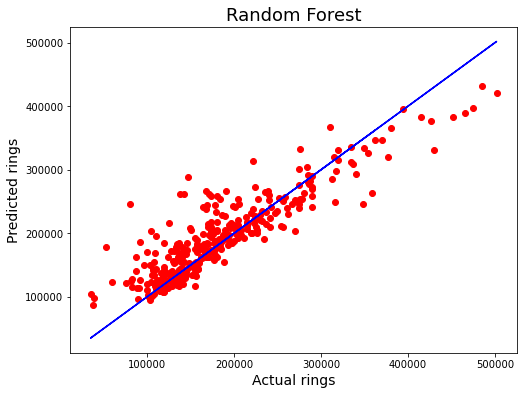

In [131]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual rings",fontsize=14)
plt.ylabel("Predicted rings",fontsize=14)
plt.title("Random Forest",fontsize=18)
plt.show()

# GridSearch Cv for GradientBoosting Regressor

In [132]:
param = {"loss":["squared_error", "absolute_error", "huber", "quantile"],"criterion":["friedman_mse","squared_error","mse","mae"],"max_features":["auto","sqrt","log2"],"n_estimators":[50,100,150,200]}
clf = GridSearchCV(GBR,param_grid=param)

In [133]:
clf.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [134]:
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'mae', 'loss': 'huber', 'max_features': 'sqrt', 'n_estimators': 200}
0.8245020684372859


In [135]:
GBR=GradientBoostingRegressor(criterion="mse",loss="huber",max_features="log2",n_estimators=100,random_state=9)
GBR.fit(X_train,y_train)
pred_gbr=GBR.predict(X_test)
R2_score = r2_score(y_test,pred_gbr)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred_gbr))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred_gbr))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred_gbr)))

R2_score: 89.23696348789251
mean_squared_error: 647832102.8595073
mean_absolute_error: 16224.063932714307
root_mean_squared_error: 25452.546097777868


In [136]:
#cross validation score
for i in range(2,10):
    scores = cross_val_score(GBR, X, y, cv = i)
    print("\nCross validation score :", scores.mean(),"At CV",i)


Cross validation score : 0.8402035270971656 At CV 2

Cross validation score : 0.8483145716461745 At CV 3

Cross validation score : 0.8402465323175976 At CV 4

Cross validation score : 0.841878498904985 At CV 5

Cross validation score : 0.8443973317482508 At CV 6

Cross validation score : 0.839814727266767 At CV 7

Cross validation score : 0.8454671238209547 At CV 8

Cross validation score : 0.8454144334542452 At CV 9


In [137]:
#difference of accuracy and cv score
scores = cross_val_score(GBR, X, y, cv = 9)
scores=scores.mean()
diff = R2_score - (scores)*100
print("\nR2_Score - Cross Validation Score :", diff)


R2_Score - Cross Validation Score : 4.695520142467998


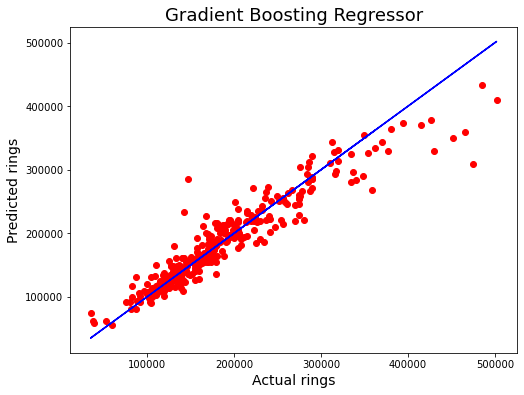

In [138]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_gbr,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual rings",fontsize=14)
plt.ylabel("Predicted rings",fontsize=14)
plt.title("Gradient Boosting Regressor",fontsize=18)
plt.show()

# Prediction of test data 

In [141]:
final_prediction=GBR.predict(dff)
final_prediction

array([355907.72624708, 218301.31574376, 230542.78787469, 172924.48667723,
       226034.51446294,  90143.38756562, 135599.21744999, 330369.33005456,
       246081.83770421, 157775.69472698,  80470.69835686, 130131.52864474,
       123129.00800588, 219331.18862057, 312241.53222814, 121980.0499688 ,
       116000.52696734, 123944.72926468, 160030.79233793, 178369.93739323,
       149256.32478505, 144357.93898166, 135018.50295165,  83464.73053895,
       110963.07339384, 131992.17466442, 159645.64785211, 135196.75647798,
       174051.76015562,  87701.43554001, 129043.63026376, 200793.93032092,
       225616.71600656, 195505.09341571, 116700.49804728, 166284.40889504,
       186484.84222078, 115064.32185034, 157914.36776193, 141582.43147697,
       100733.24819923, 328773.51999478, 203845.919363  , 194586.63173941,
       129906.37952921, 127585.13244128, 116895.10954758,  88152.84813097,
       215052.7602891 , 321415.46005187, 126964.20762076, 205308.90575161,
        94231.39648772,  

In [142]:
House_Price_Predictions=pd.DataFrame()
House_Price_Predictions["SalePrice"]=final_prediction
House_Price_Predictions.head(10)

SalePrice
0  355907.726247
1  218301.315744
2  230542.787875
3  172924.486677
4  226034.514463
5   90143.387566
6  135599.217450
7  330369.330055
8  246081.837704
9  157775.694727

In [143]:
House_Price_Predictions.to_csv("House_Price_testpred.csv",index=False)

# Model saving 

In [144]:
import pickle 
filename= "House_price.pkl"
pickle.dump(GBR, open(filename,"wb"))

# Conclusion 

In [145]:
a=np.array(y_test)
predicted = np.array(GBR.predict(X_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index=range(len(a)))
df_com

original      predicted
0      137000  135268.538667
1      168500  171109.771740
2      115000  114026.267731
3      280000  220749.205527
4      140000  137427.338604
..        ...            ...
346    110000  103033.850347
347    137500  148500.356255
348    170000  198531.922872
349    139000  125635.934201
350    361919  334533.423717

[351 rows x 2 columns]